In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

## Passo_01: Escolher ativo

In [2]:
ativo = "WEGE3.SA"

## Passo_02: Pegar dados de cotação

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

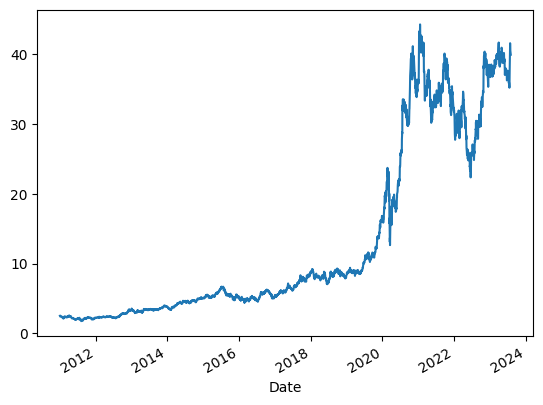

In [6]:
dados_ativo = yf.download(ativo, "2010-12-31")
dados_ativo["Adj Close"].plot()

## Passo_03: Calcular retornos

In [8]:
dados_ativo["Retornos"] = dados_ativo["Adj Close"].pct_change().dropna()

## Passo_04: Separar retornos

In [11]:
dados_ativo["Retorno Positivo"] = dados_ativo["Retornos"].apply(lambda x: x if x > 0 else 0)
dados_ativo["Retorno Negativo"] = dados_ativo["Retornos"].apply(lambda x: abs(x) if x < 0 else 0)

dados_ativo

,Open,High,Low,Close,Adj Close,Volume,Retornos,Retorno Positivo,Retorno Negativo
Date,,,,,,,,,
2011-01-03,3.254437,3.323964,3.233727,3.251479,2.520231,2290288,NaN,0.000000,0.000000
2011-01-04,3.286982,3.292899,3.181952,3.195266,2.476661,2618824,-0.017288,0.000000,0.017288
2011-01-05,3.195266,3.233727,3.150887,3.152366,2.443410,3096756,-0.013426,0.000000,0.013426
2011-01-06,3.177514,3.183431,3.100591,3.118343,2.417037,2873676,-0.010794,0.000000,0.010794
2011-01-07,3.162721,3.167159,3.112426,3.122781,2.420478,3000764,0.001424,0.001424,0.000000
...,...,...,...,...,...,...,...,...,...
2023-07-25,41.680000,42.080002,40.480000,40.500000,40.500000,9924300,-0.025036,0.000000,0.025036
2023-07-26,40.430000,40.860001,40.009998,40.480000,40.480000,7944300,-0.000494,0.000000,0.000494
2023-07-27,40.480000,41.040001,40.070000,40.349998,40.349998,8479800,-0.003211,0.000000,0.003211


## Passo_05: Calcular a média dos retornos

In [16]:
dados_ativo["Média Retorno Positivo"] = dados_ativo["Retorno Positivo"].rolling(window = 22).mean()
dados_ativo["Média Retorno Negativo"] = dados_ativo["Retorno Negativo"].rolling(window = 22).mean()

dados_ativo = dados_ativo.dropna()

dados_ativo

,Open,High,Low,Close,Adj Close,Volume,Retornos,Retorno Positivo,Retorno Negativo,Média Retorno Positivo,Média Retorno Negativo
Date,,,,,,,,,,,
2011-02-02,2.968934,2.971893,2.884615,2.912721,2.257659,948428,-0.038574,0.0,0.038574,0.003148,0.008039
2011-02-03,2.899408,2.899408,2.841715,2.847633,2.207210,1669,-0.022346,0.0,0.022346,0.003148,0.009054
2011-02-04,2.849112,2.855029,2.782544,2.819526,2.185424,3119740,-0.009870,0.0,0.009870,0.003148,0.008717
2011-02-07,2.868343,2.868343,2.726331,2.736686,2.121213,1777204,-0.029381,0.0,0.029381,0.003148,0.009442
2011-02-08,2.763313,2.810650,2.708579,2.732248,2.117774,3914,-0.001621,0.0,0.001621,0.003148,0.009025
...,...,...,...,...,...,...,...,...,...,...,...
2023-07-25,41.680000,42.080002,40.480000,40.500000,40.500000,9924300,-0.025036,0.0,0.025036,0.010088,0.004986
2023-07-26,40.430000,40.860001,40.009998,40.480000,40.480000,7944300,-0.000494,0.0,0.000494,0.010088,0.004833
2023-07-27,40.480000,41.040001,40.070000,40.349998,40.349998,8479800,-0.003211,0.0,0.003211,0.009963,0.004979


## Passo_06: Calcular o RSI

$$ RSI = 100 - \frac{100}{1 + \frac{\bar x > 0}{\bar x < 0}}$$

In [20]:
dados_ativo["RSI"] = (100 - 100/(
    1 + dados_ativo["Média Retorno Positivo"] / dados_ativo["Média Retorno Negativo"]))
dados_ativo.head()

/var/folders/wr/5v6s61w91pzf0mb0byz73xq80000gn/T/ipykernel_82551/2935462040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_ativo["RSI"] = (100 - 100/(


,Open,High,Low,Close,Adj Close,Volume,Retornos,Retorno Positivo,Retorno Negativo,Média Retorno Positivo,Média Retorno Negativo,RSI
Date,,,,,,,,,,,,
2011-02-02,2.968934,2.971893,2.884615,2.912721,2.257659,948428,-0.038574,0.0,0.038574,0.003148,0.008039,28.143641
2011-02-03,2.899408,2.899408,2.841715,2.847633,2.207210,1669,-0.022346,0.0,0.022346,0.003148,0.009054,25.801050
2011-02-04,2.849112,2.855029,2.782544,2.819526,2.185424,3119740,-0.009870,0.0,0.009870,0.003148,0.008717,26.534214
2011-02-07,2.868343,2.868343,2.726331,2.736686,2.121213,1777204,-0.029381,0.0,0.029381,0.003148,0.009442,25.005779
2011-02-08,2.763313,2.810650,2.708579,2.732248,2.117774,3914,-0.001621,0.0,0.001621,0.003148,0.009025,25.862148


## Passo_07: Gerar sinais de compra ou venda